# Computational Methods in Economics

## Q & A 2019

In [1]:
# Author: Alex Schmitt (schmitt@ifo.de)

import datetime
print('Last update: ' + str(datetime.datetime.today()))

Last update: 2019-02-08 10:19:00.248008


### Preliminaries

#### Import Modules

In [2]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

import scipy.optimize

import IPython.display as display

### PS Function Approximation 

Question 5 (N)

The simplest approach to approximating a univariate function $f$ is (piecewise) linear interpolation. As before, define a grid $x_1, ..., x_m$ and compute the function values $f(x_1), ... , f(x_m)$. Then, to approximate $f(x)$, find the two grid points $x_i$ and $x_{i+1}$ that bracket $x$, i.e. such that $x_l \equiv x_i \le x \le x_{i + 1} \equiv x_r $. The interpolant is given by:

\begin{equation}
    \hat{f}(x)=f(x_{l})+{\frac {f(x_{r})-f(x_{l})}{x_{r}-x_{l}}}(x-x_{l})
\end{equation}

(a) Write a function **lin_int** that takes three arguments - a scalar **'x'** at which to approximate the function, an array **'X'** consisting of $m$ grid points and an array **'Y'** containing the function values corresponding to the grid - and that implements this interpolation scheme. Use this function to approximate the sine function $f(x) = \sin(x)$ between 0 and $2\pi$. Compare your result to Numpy's **interp** function. Plot both the approximated and the true function values.

**Hint**: The slightly tricky part here is to find $x_l$ and $x_r$. There are different ways to achieve this; one possibility is Numpy's **argwhere** function. You may want to combine this with a **try/except** statement.

In [3]:
def lin_int(x, X, Y):
    """
    Implements one-dimensional piecewise linear interpolation given a grid X and corresponding function values Y, on a point x
    """  
    try:
        pos = np.argwhere(x > X)[-1]
    except:
        pos = 0
            
    return Y[pos] + ((Y[pos + 1] - Y[pos]) / (X[pos + 1] - X[pos])) * (x - X[pos])    

In [4]:
X = np.array([1,2,3,4])
x = 3
np.argwhere(x > X)

array([[0],
       [1]])

--------------------------------------------------------------------------------------------------------------------------------

### Lecture 4

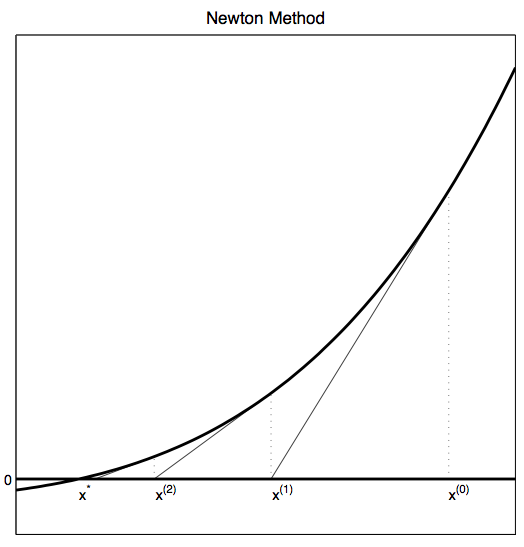

In [5]:
display.Image('Lecture4_RootFinding/graph_newton.png')

Comparing to simple function iteration above, we have one additional term, the derivative of $f$ at $x^{(k)}$. Hence, we use *more information on the properties of the function* than above. 

More precisely, we put a weight on the distance between the old guess $x^{(k)}$ and the new guess $x^{(k+1)}$. With function iteration, this weight was given by $f(x^{(k)})$, while in Newton's method, it is $f(x^{(k)})/f'(x^{(k)})$. 

It is intuitive why this is an improvement:
- if the absolute value of $f'(x^{(k)})$ is small, this means the function is relatively flat at $x^{(k)}$; in this case, it is likely that the current guess $x^{(k)}$ is still far from the root, and hence the jump to the next guess should be large
- if the absolute value of $f'(x^{(k)})$ is large, the function is relatively steep, making it more likely that we are close to  the root; hence the jump to the next guess should be small

--------------------------------------------------------------------------------------------------------------------------------

### Lecture 2 and 4

##### L4

In contrast, if $x$ is of magnitude $1\text{e+10}$, the same tolerance level would imply that the first 18 digits must be the same for the algorithm to stop. Recall that with double precision, if the difference in magnitude of two numbers is **less** than machine epsilon - here $x$ and $tol$ - the computer cannot distinguish between $x$ and $x + tol$.

In other words, the stopping rule would effectively require $x^{(k+1)} = x^{(k)}$. This would be more accurate as in the first example, but also require the algorithm to run for longer. 

In [7]:
tol = 1e-8
x1 = 1e+10
x2 = 1e+10 + tol
print(format(x1, '.20f'))
print(format(x2, '.20f'))

10000000000.00000000000000000000
10000000000.00000000000000000000


--------------------------------------------------------------------------------------------------------------------------------

### Review: Some Key Insights from Lecture 2

- Let $y$ denote a DP floating point number. On a computer, $y$ is represented by three integers $s$, $e$ and $f$, according to the following formula given by the "Standard":

\begin{equation}
    y = (-1)^s \cdot \left(1 + \frac{f}{2^{52}}\right) \cdot 2^{e - 1023}
\end{equation}

- What follows directly from this *finite set of DP numbers* is that not all real numbers can be represented as DP floats. When working with real numbers that cannot, those are instead *approximated by the closest DP number*.  

\begin{equation}
    z \approx (z)_{DP} = z_{DP} = y
\end{equation}

where $z$ is a real number (but not a DP number), while $y$ is the closest DP number.

- For two adjacent DP numbers $y_1$ and $y_2$ with $y_1 < y_2$, their distance increases for larger numbers:

\begin{equation}
   | y_2 - y_1 | = \epsilon_{DP} 2^{e(y_1) - 1023} 
\end{equation}

**This result was proven in problem set 3.**

- *The absolute relative error in the DP approximation $z_{DP}$ to the real number $z$ is at most half machine epsilon*.

\begin{equation}
    |\mu| \equiv \left| \frac{z_{DP} - z}{z} \right| \le \frac{1}{2} \epsilon_{DP}
\end{equation}

**This result was proven in problem set 3.**


##### Appendix L2

Adding or subtracting two floats whose relative magnitudes differ by **less** than machine epsilon is not meaningful in the sense that the smaller value is effectively treated as zero. Formally, let $z$ and $w$ be real numbers such that

\begin{equation}
    \frac{w}{z} = r.
\end{equation}

It can be shown that for $z$ and $z + w$ to be represented by **different** DP numbers, their relative magnitude must be at least $\epsilon_{DP}$:

\begin{equation}
    (z + w)_{DP} > (z)_{DP} \ \ \Rightarrow\ \ r \ge \epsilon_{DP}
\end{equation}

**Proof: omitted, but follows from the results above!**

Example:

In [8]:
z = 1234.567
w = 1e-13
print( (w / z) < 2**(-52))
print(format(z, '.20f'))
print(format(z + w, '.20f'))

True
1234.56700000000000727596
1234.56700000000000727596


--------------------------------------------------------------------------------------------------------------------------------

### Lecture 5

In [ ]:
def my_opt(x, obj, step, maxit = 100, eps = 1e-8, delta = 1e-4):
    """
    Implements the iterative procedure for all of the optimization algorithms considered below. 
    Mandatory inputs are 
    -> x: initial guess for the minimizing vector
    -> obj: objective, defined a function of x
    -> step: a function implementing how the step from x(k) to x(k+1) is determined
    """
    dist = 1
    it = 0
    
    lx = []
    while dist > eps and it < maxit:
        lx.append(x)
        it += 1
    
        s, alpha = step(x, obj)
    
        dist = np.linalg.norm(s) / (1 + np.linalg.norm(x))
        print(it, dist, alpha)
        x = x + s
    
    ## check for optimality
    gr = sm.tools.numdiff.approx_fprime(x, obj)
    if np.linalg.norm(gr) > delta * (1 + abs(obj(x))):
        print('Solution does not appear an optimum!')
    
    return x, lx 

In [ ]:
def newton_rb(x, obj):
    """
    Implements the Newton-Raphson update rule for the Rosenbrock function
    """
    gr = scipy.optimize.rosen_der(x)
    H = scipy.optimize.rosen_hess(x)
    
    return ( scipy.linalg.solve(H, -gr), 1)

##### Line Search

As we can see, this takes the same number of iterations as the original Newton-Raphson method. One issue with adjusting $\alpha$ is that convergence can be slower: recall that Newton-Raphson guaranteed quadratic convergence once $\mathbf{x}^{(k)}$ is sufficiently close the solution $\mathbf{x}^*$. 

This is not true for Newton-Raphson with line search. One way around is to use line search initially, but then go to Newton-Raphson once $\alpha^{(k)}$ is close to unity. 

--------------------------------------------------------------------------------------------------------------------------------

### Lecture 8

Why do we use **.copy()** in the following piece of code?

In [ ]:
## initialize initial guess for basis coefficients and optimization
a_ch = a0.copy()
x0 = (0, 0)

eps = 1
it = 0
maxit = 100

while eps > 1e-8 and it < maxit:
    it += 1
    ## optimization step
    V, K, H = opt_step(k_grid, vf_rhs, x0, a_ch, k_min, k_max, params)
    ## fitting step
    a_new = fa.chebapprox(V, n)
    ## compute convergence criterion
    eps = np.linalg.norm(a_new - a_ch)
    ## update coefficients
    a_ch = a_new.copy()

print(it, eps)

Simple example:

In [9]:
a1 = np.array([1, 2, 3])
a2 = np.array([4, 5, 6])

In [10]:
a1 = a2
a2 = np.array([7, 8, 9])
print(a1, a2)

[4 5 6] [7 8 9]


Hence, **.copy()** is actually not necessary here, since we don't change individual elements of **a2** (or **a_new** in the example above)

But recall:

In [13]:
a1 = np.array([1, 2, 3])
a2 = np.array([4, 5, 6])

In [14]:
a1 = a2.copy()
a2[2] = 9
print(a1, a2)

[4 5 6] [4 5 9]
